In [1]:
import numpy as np
import pandas as pd

In [2]:
import torch
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(device)

cuda


In [3]:
#check gpu device (if using gpu)
print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 4070 Laptop GPU


In [30]:
df = pd.read_csv("2022_final.csv", encoding='cp949')
stations_to_remove = df[(df['역번호'] > 1000) | (df['역번호'] < 199)].index
df.drop(stations_to_remove, inplace=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler(feature_range=(0, 1))
up_weekday_scaler = MinMaxScaler(feature_range=(0, 1))
up_saturday_scaler = MinMaxScaler(feature_range=(0, 1))
up_sunday_scaler = MinMaxScaler(feature_range=(0, 1))
down_weekday_scaler = MinMaxScaler(feature_range=(0, 1))
down_saturday_scaler = MinMaxScaler(feature_range=(0, 1))
down_sunday_scaler = MinMaxScaler(feature_range=(0, 1))

features = ['승차_Weekday', '승차_Saturday', '승차_Sunday', '하차_Weekday', '하차_Saturday', '하차_Sunday', '환승_Weekday', '환승_Saturday', '환승_Sunday', 'interval_Weekday', 'interval_Saturday', 'interval_Sunday', 'capacity']

df[features] = feature_scaler.fit_transform(df[features])
df['상선_Weekday'] = up_weekday_scaler.fit_transform(df['상선_Weekday'].to_frame())
df['상선_Saturday'] = up_saturday_scaler.fit_transform(df['상선_Saturday'].to_frame())
df['상선_Sunday'] = up_sunday_scaler.fit_transform(df['상선_Sunday'].to_frame())
df['하선_Weekday'] = down_weekday_scaler.fit_transform(df['하선_Weekday'].to_frame())
df['하선_Saturday'] = down_saturday_scaler.fit_transform(df['하선_Saturday'].to_frame())
df['하선_Sunday'] = down_sunday_scaler.fit_transform(df['하선_Sunday'].to_frame())

df.to_csv('2022_scaled.csv', index=False, encoding='cp949')

In [6]:
df['progression'] = [0.0] * len(df)
weekday_up = ['역번호', '승차_Weekday', '하차_Weekday', '환승_Weekday', 'interval_Weekday', 'capacity', 'progression', '상선_Weekday']
weekday_down = ['역번호', '승차_Weekday', '하차_Weekday', '환승_Weekday', 'interval_Weekday', 'capacity', 'progression', '하선_Weekday']
weekday_up2 = ['승차_Weekday', '하차_Weekday', '환승_Weekday', 'interval_Weekday', 'capacity', 'progression', '상선_Weekday']
weekday_down2 = ['승차_Weekday', '하차_Weekday', '환승_Weekday', 'interval_Weekday', 'capacity', 'progression', '하선_Weekday']
hours = ['06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대']

start = [0, 0, 0, 9, 5, 10, 10, 9, 10]
end = [0, 0, 0, 52, 34, 48, 47, 50, 27]
num_stations = [0, 0, 43, 44, 51, 56, 39, 53, 18]

for line in range(2,9):
    for period in hours:
        tmp = df.loc[df['호선'] == line]
        tmp = tmp[weekday_up]
        tmp2 = tmp.loc[df['hour'] == period]
        tmp2 = tmp2.sort_values(by='역번호', axis=0, ascending=False, inplace=False)
        if (line == 2):
            tmp2['progression'] = [0.5] * len(tmp2)
        else:
            tmp2['progression'] = (num_stations[line] - (tmp2['역번호'] - line * 100 - start[line])) / num_stations[line]
        tmp3 = tmp2[weekday_up2]
        pd.DataFrame(tmp3).to_csv(f'weekday_split\\{line}_{period}_up.csv', index=False, encoding='cp949')

    for period in hours:
        tmp = df.loc[df['호선'] == line]
        tmp = tmp[weekday_down]
        tmp2 = tmp.loc[df['hour'] == period]
        tmp2 = tmp2.sort_values(by='역번호', axis=0, ascending=True, inplace=False)
        if (line == 2):
            tmp2['progression'] = [0.5] * len(tmp2)
        else:
            tmp2['progression'] = (tmp2['역번호'] - line * 100 - start[line]) / num_stations[line]
        tmp3 = tmp2[weekday_down2]
        pd.DataFrame(tmp3).to_csv(f'weekday_split\\{line}_{period}_down.csv', index=False, encoding='cp949')

In [7]:
saturday_up = ['역번호', '승차_Saturday', '하차_Saturday', '환승_Saturday', 'interval_Saturday', 'capacity', 'progression', '상선_Saturday']
saturday_down = ['역번호', '승차_Saturday', '하차_Saturday', '환승_Saturday', 'interval_Saturday', 'capacity', 'progression', '하선_Saturday']
saturday_up2 = ['승차_Saturday', '하차_Saturday', '환승_Saturday', 'interval_Saturday', 'capacity', 'progression', '상선_Saturday']
saturday_down2 = ['승차_Saturday', '하차_Saturday', '환승_Saturday', 'interval_Saturday', 'capacity', 'progression', '하선_Saturday']

for line in range(2,9):
    for period in hours:
        tmp = df.loc[df['호선'] == line]
        tmp = tmp[saturday_up]
        tmp2 = tmp.loc[df['hour'] == period]
        tmp2 = tmp2.sort_values(by='역번호', axis=0, ascending=True, inplace=False)
        if (line == 2):
            tmp2['progression'] = [0.5] * len(tmp2)
        else:
            tmp2['progression'] = (num_stations[line] - (tmp2['역번호'] - line * 100 - start[line])) / num_stations[line]
        tmp3 = tmp2[saturday_up2]
        pd.DataFrame(tmp3).to_csv(f'saturday_split\\{line}_{period}_up.csv', index=False, encoding='cp949')

    for period in hours:
        tmp = df.loc[df['호선'] == line]
        tmp = tmp[saturday_down]
        tmp2 = tmp.loc[df['hour'] == period]
        tmp2 = tmp2.sort_values(by='역번호', axis=0, ascending=False, inplace=False)
        if (line == 2):
            tmp2['progression'] = [0.5] * len(tmp2)
        else:
            tmp2['progression'] = (num_stations[line] - (tmp2['역번호'] - line * 100 - start[line])) / num_stations[line]
        tmp3 = tmp2[saturday_down2]
        pd.DataFrame(tmp3).to_csv(f'saturday_split\\{line}_{period}_down.csv', index=False, encoding='cp949')

In [8]:
sunday_up = ['역번호', '승차_Sunday', '하차_Sunday', '환승_Sunday', 'interval_Sunday', 'capacity', 'progression', '상선_Sunday']
sunday_down = ['역번호', '승차_Sunday', '하차_Sunday', '환승_Sunday', 'interval_Sunday', 'capacity', 'progression', '하선_Sunday']
sunday_up2 = ['승차_Sunday', '하차_Sunday', '환승_Sunday', 'interval_Sunday', 'capacity', 'progression', '상선_Sunday']
sunday_down2 = ['승차_Sunday', '하차_Sunday', '환승_Sunday', 'interval_Sunday', 'capacity', 'progression', '하선_Sunday']

for line in range(2, 9):
    for period in hours:
        tmp = df.loc[df['호선'] == line]
        tmp = tmp[sunday_up]
        tmp2 = tmp.loc[df['hour'] == period]
        tmp2 = tmp2.sort_values(by='역번호', axis=0, ascending=True, inplace=False)
        if (line == 2):
            tmp2['progression'] = [0.5] * len(tmp2)
        else:
            tmp2['progression'] = (num_stations[line] - (tmp2['역번호'] - line * 100 - start[line])) / num_stations[line]
        tmp3 = tmp2[sunday_up2]
        pd.DataFrame(tmp3).to_csv(f'sunday_split\\{line}_{period}_up.csv', index=False, encoding='cp949')

    for period in hours:
        tmp = df.loc[df['호선'] == line]
        tmp = tmp[sunday_down]
        tmp2 = tmp.loc[df['hour'] == period]
        tmp2 = tmp2.sort_values(by='역번호', axis=0, ascending=False, inplace=False)
        if (line == 2):
            tmp2['progression'] = [0.5] * len(tmp2)
        else:
            tmp2['progression'] = (num_stations[line] - (tmp2['역번호'] - line * 100 - start[line])) / num_stations[line]
        tmp3 = tmp2[sunday_down2]
        pd.DataFrame(tmp3).to_csv(f'sunday_split\\{line}_{period}_down.csv', index=False, encoding='cp949')

In [5]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Assume your time series data is already preprocessed and in the format of PyTorch tensors
# Each time series is a 2D tensor of shape (sequence_length, num_features)

# Training data (multiple time series)
import os
# assign directory
directories = ['weekday_split', 'saturday_split', 'sunday_split']
time_series_list = []
X = []
y = []
time_steps = 8

for directory in directories:
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            tmp = pd.read_csv(f, encoding='cp949')
            tmp = tmp.astype(float)
            tens = torch.from_numpy(tmp.values)
            time_series_list.append(tens)

for ts in time_series_list:
    for i in range(len(ts) - time_steps):
        X.append(ts[i:i + time_steps])
        y.append(ts[i + time_steps, -1])  # Assuming the last feature is the target

y = np.array(y)
# Convert to PyTorch tensors
X = torch.stack(X, dim=0)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.size())
print(y.size())

torch.Size([20127, 8, 7])
torch.Size([20127])


C:\Users\Kang\AppData\Local\Temp\ipykernel_16788\2447212344.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


In [7]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx].unsqueeze(-1)

dataset = TimeSeriesDataset(X, y)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% of the data for training
val_size = len(dataset) - train_size  # Remaining 20% for validation

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [8]:
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        return out

input_size = X.shape[2]  # Number of features in the input data
hidden_size = 70        # Number of features in the hidden state
num_layers = 5      # Number of stacked LSTM layers
output_size = 1          # Number of output features (1 target feature)

model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()
    
    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

Epoch [1/50], Loss: 0.0016, Val Loss: 0.0025
Epoch [2/50], Loss: 0.0012, Val Loss: 0.0024
Epoch [3/50], Loss: 0.0001, Val Loss: 0.0023
Epoch [4/50], Loss: 0.0019, Val Loss: 0.0028
Epoch [5/50], Loss: 0.0049, Val Loss: 0.0023
Epoch [6/50], Loss: 0.0007, Val Loss: 0.0021
Epoch [7/50], Loss: 0.0054, Val Loss: 0.0032
Epoch [8/50], Loss: 0.0008, Val Loss: 0.0023
Epoch [9/50], Loss: 0.0022, Val Loss: 0.0025
Epoch [10/50], Loss: 0.0001, Val Loss: 0.0022
Epoch [11/50], Loss: 0.0018, Val Loss: 0.0020
Epoch [12/50], Loss: 0.0010, Val Loss: 0.0023
Epoch [13/50], Loss: 0.0024, Val Loss: 0.0019
Epoch [14/50], Loss: 0.0007, Val Loss: 0.0023
Epoch [15/50], Loss: 0.0006, Val Loss: 0.0020
Epoch [16/50], Loss: 0.0002, Val Loss: 0.0020
Epoch [17/50], Loss: 0.0002, Val Loss: 0.0019
Epoch [18/50], Loss: 0.0016, Val Loss: 0.0018
Epoch [19/50], Loss: 0.0047, Val Loss: 0.0021
Epoch [20/50], Loss: 0.0009, Val Loss: 0.0017
Epoch [21/50], Loss: 0.0032, Val Loss: 0.0018
Epoch [22/50], Loss: 0.0001, Val Loss: 0.00

In [39]:
scaled_new_ts = pd.read_csv("5_12-13시간대_down.csv", encoding='cp949')
scaled_new_ts = scaled_new_ts.to_numpy()
print(scaled_new_ts.shape)

(49, 7)


In [40]:
# New time series for testing
actual = scaled_new_ts[:, -1].copy()
scaled_new_ts[time_steps:, -1] = 0.0
X_test = scaled_new_ts.copy()
# Initialize the placeholder for predictions
predictions = []

In [41]:
# Make predictions
model.eval()
with torch.no_grad():
    for t in range(time_steps, X_test.shape[0]+1):
        # Prepare the input for the model
        X_input = X_test[t-time_steps:t, :]  # Inputs up to the current time step
        X_input = [X_input]
        
        # Convert to tensor
        X_input_tensor = torch.tensor(X_input, dtype=torch.float32).to(device)
        
        # Predict the target feature
        y_pred = model(X_input_tensor)
        pred_value = y_pred.cpu().numpy()[0][0]
        # Update the placeholder with the predictions
        predictions.append(pred_value)
        
        # Update the input with the predicted target feature for the next step
        if (t != X_test.shape[0]):
            X_test[t, -1] = pred_value
        
predicted = predictions[:-1]
actual = actual[time_steps:]
predicted = np.reshape(predicted, (-1,1))
predicted = down_sunday_scaler.inverse_transform(predicted)  #switch scaler as needed
actual = np.reshape(actual, (-1,1))
actual = down_sunday_scaler.inverse_transform(actual)
    
# Print the final prediction values of the last feature (target feature)
print("Predicted values:", predicted)  # Remove the extra dimension for readability
print("Actual values:", actual)

Predicted values: [[24.942482]
 [27.29688 ]
 [25.297289]
 [26.851532]
 [30.346502]
 [32.007076]
 [34.444523]
 [29.983639]
 [32.274685]
 [32.826965]
 [32.559383]
 [27.341715]
 [28.801868]
 [30.538857]
 [27.911785]
 [27.73444 ]
 [31.968094]
 [36.40472 ]
 [36.594845]
 [35.898968]
 [36.348083]
 [36.271694]
 [38.920048]
 [39.346397]
 [39.059166]
 [40.770905]
 [40.441113]
 [40.36543 ]
 [44.847176]
 [42.48603 ]
 [38.77567 ]
 [36.06258 ]
 [33.689293]
 [29.402376]
 [24.213886]
 [22.207987]
 [21.799416]
 [21.362406]
 [17.694054]
 [11.203169]
 [ 6.950793]]
Actual values: [[26.45]
 [29.15]
 [27.05]
 [25.95]
 [29.15]
 [30.95]
 [32.7 ]
 [26.1 ]
 [26.25]
 [25.9 ]
 [27.15]
 [23.1 ]
 [22.5 ]
 [21.85]
 [19.85]
 [19.6 ]
 [22.2 ]
 [27.65]
 [31.2 ]
 [30.4 ]
 [31.05]
 [30.95]
 [30.55]
 [30.  ]
 [31.35]
 [34.85]
 [30.75]
 [31.7 ]
 [40.7 ]
 [39.1 ]
 [36.75]
 [32.3 ]
 [29.1 ]
 [25.8 ]
 [17.85]
 [14.4 ]
 [12.4 ]
 [10.45]
 [ 9.2 ]
 [ 4.7 ]
 [ 2.8 ]]


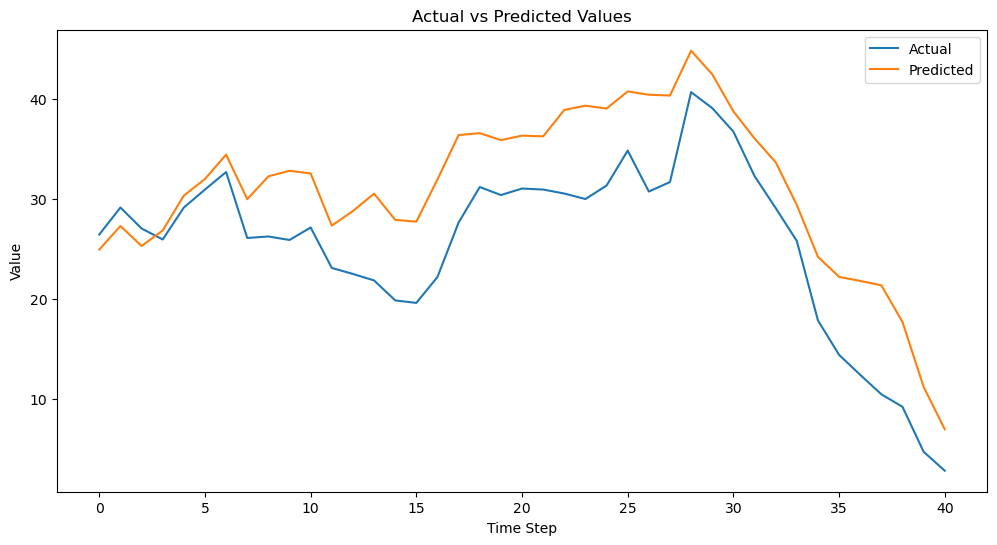

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

In [43]:
predicted = np.array(predicted)
actual = np.array(actual)

# MSE (Mean Squared Error) 계산
mse = np.mean((predicted - actual) ** 2)
print(f'MSE: {mse:.4f}')

# R^2 점수 계산
ss_total = np.sum((actual - np.mean(actual)) ** 2)
ss_residual = np.sum((actual - predicted) ** 2)
r2_score = 1 - (ss_residual / ss_total)
print(f'R^2 Score: {r2_score:.4f}')

MSE: 39.9610
R^2 Score: 0.4485
